# ****Fuzzy Logic - Rekomendasi Bengkel****

Kelompok 1 (IF-44-08):
1. Anyelir Belia Azzahra (1301200048)
2. Risma Amaliyah Mahmudah (1301204087)
3. Muhammad Rafi Irfansyah (1301204500) 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Membaca data dari file**

In [ ]:
data = pd.read_excel("https://github.com/rismaamaliyah/Fuzzy-Logic/blob/main/bengkel.xlsx?raw=true")
data.sample(8)

,id,servis,harga
33,34,93,4
29,30,7,6
70,71,39,3
20,21,48,2
46,47,21,3
15,16,82,6
35,36,32,6
32,33,33,8


# **Fuzzifikasi**

**Fungsi keanggotaan harga:**


*   Nilai harga ≤ 4 bernilai Sangat Murah
*   Nilai 5 ≤ harga ≤ 7 bernilai Murah
*   Nilai 8 ≤ harga ≤ 9 bernilai Mahal
*   Nilai harga > 9 bernilai Sangat Mahal

In [ ]:
def fuzzy_harga(x):
    harga = {'Sangat Murah': 0, 'Murah': 0, 'Mahal': 0, 'Sangat Mahal': 0}

    a, b, c, d, e, f = 4, 5, 7, 8, 9, 10

    # Garis Datar
    if x <= a:
        harga['Sangat Murah'] = 1
    if b <= x <= c:
        harga['Murah'] = 1
    if d <= x <= e:
        harga['Mahal'] = 1
    if x >= f:
        harga['Sangat Mahal'] = 1
    
    # Garis Miring (Gradient)
    if a < x <= b:
        harga['Sangat Murah'] = -(x - b) / (b - a)
    if a < x < b:
        harga['Murah'] = (x - a) / (b - a)
    if c < x <= d:
        harga['Murah'] = -(x - d) / (d - c)
    if c < x < d:
        harga['Mahal'] = (x - c) / (d - c)
    if e < x < f:
        harga['Mahal'] = -(x - f) / (f - e)
    if e < x <= f:
        harga['Sangat Mahal'] = (x - e) / (f - e)
        
    return harga

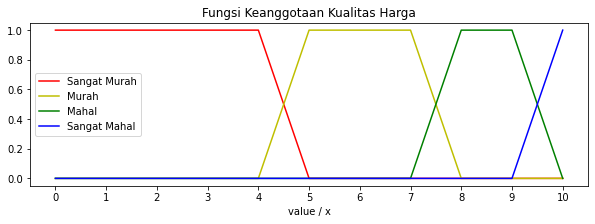

In [ ]:
plt.figure(figsize=(10, 3))
plt.title("Fungsi Keanggotaan Kualitas Harga")

plt.plot(range(11), [fuzzy_harga(x)['Sangat Murah'] for x in range(11)], 'r')
plt.plot(range(11), [fuzzy_harga(x)['Murah'] for x in range(11)], 'y')
plt.plot(range(11), [fuzzy_harga(x)['Mahal'] for x in range(11)], 'g')
plt.plot(range(11), [fuzzy_harga(x)['Sangat Mahal'] for x in range(11)], 'b')

plt.plot(0, 0, 'r', linewidth=1.5, label='Sangat Murah')
plt.plot(0, 0, 'y', linewidth=1.5, label='Murah')
plt.plot(0, 0, 'g', linewidth=1.5, label='Mahal')
plt.plot(0, 0, 'b', linewidth=1.5, label='Sangat Mahal')

plt.xticks(list(range(11)))
plt.xlabel("value / x")
plt.legend()
plt.show()

**Fungsi keanggotaan servis:**


*   Nilai servis ≤ 40 bernilai Sangat Kurang
*   Nilai 50 ≤ servis ≤ 70 bernilai Kurang dengan nilai dari 41 - 79
*   Nilai 80 ≤ servis ≤ 90 bernilai Baik dengan nilai dari 71 - 94
*   Nilai servis ≥ 95 bernilai Sangat Baik

In [ ]:
def fuzzy_servis(x):
    servis = {'Sangat Kurang': 0, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 0}

    a, b, c, d, e, f = 40, 50, 70, 80, 90, 95
    
    # Garis Datar
    if x <= a:
        servis['Sangat Kurang'] = 1
    if b <= x <= c:
        servis['Kurang'] = 1
    if d <= x <= e:
        servis['Baik'] = 1
    if x >= f:
        servis['Sangat Baik'] = 1

    # Garis Miring (Gradient)   
    if a < x <= b:
        servis['Sangat Kurang'] = -(x - b) / (b - a)
    if a < x < b:
        servis['Kurang'] = (x - a) / (b - a)
    if c < x <= d:
        servis['Kurang'] = -(x - d) / (d - c)
    if c < x < d:
        servis['Baik'] = (x - c) / (d - c)
    if e < x < f:
        servis['Baik'] = -(x - f) / (f - e)
    if e < x <= f:
        servis['Sangat Baik'] = (x - e) / (f - e)
        
    return servis

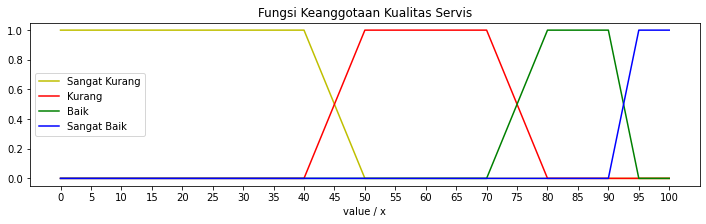

In [ ]:
plt.figure(figsize=(12, 3))
plt.title("Fungsi Keanggotaan Kualitas Servis")

plt.plot(range(101), [fuzzy_servis(x)['Sangat Kurang'] for x in range(101)], 'y')
plt.plot(range(101), [fuzzy_servis(x)['Kurang'] for x in range(101)], 'r')
plt.plot(range(101), [fuzzy_servis(x)['Baik'] for x in range(101)], 'g')
plt.plot(range(101), [fuzzy_servis(x)['Sangat Baik'] for x in range(101)], 'b')

plt.plot(0, 0, 'y', linewidth=1.5, label='Sangat Kurang')
plt.plot(0, 0, 'r', linewidth=1.5, label='Kurang')
plt.plot(0, 0, 'g', linewidth=1.5, label='Baik')
plt.plot(0, 0, 'b', linewidth=1.5, label='Sangat Baik')

plt.xticks(np.arange(0, 105, 5.0))
plt.xlabel("value / x")
plt.legend()
plt.show()

# ****Proses Fuzzifikasi****

In [ ]:
fuzzify = []

for servis, harga in zip(data['servis'], data['harga']):
    fuzzy = {'Servis': 0, 'Harga': 0}

    fuzzy['Servis'] = fuzzy_servis(servis)
    fuzzy['Harga'] = fuzzy_harga(harga)

    fuzzify.append(fuzzy)

In [ ]:
print("Contoh Hasil Fuzzifikasi :\n")
for i in range(0, 10, 2):
    print("Servis  :", fuzzify[i]['Servis'])
    print("Harga   :", fuzzify[i]['Harga'], end="\n\n")


Contoh Hasil Fuzzifikasi :

Servis  : {'Sangat Kurang': 0, 'Kurang': 1, 'Baik': 0, 'Sangat Baik': 0}
Harga   : {'Sangat Murah': 0, 'Murah': 1, 'Mahal': 0, 'Sangat Mahal': 0}

Servis  : {'Sangat Kurang': 0, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 1}
Harga   : {'Sangat Murah': 1, 'Murah': 0, 'Mahal': 0, 'Sangat Mahal': 0}

Servis  : {'Sangat Kurang': 1, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 0}
Harga   : {'Sangat Murah': 1, 'Murah': 0, 'Mahal': 0, 'Sangat Mahal': 0}

Servis  : {'Sangat Kurang': 0, 'Kurang': 1, 'Baik': 0, 'Sangat Baik': 0}
Harga   : {'Sangat Murah': 0, 'Murah': 0.0, 'Mahal': 1, 'Sangat Mahal': 0}

Servis  : {'Sangat Kurang': 0.5, 'Kurang': 0.5, 'Baik': 0, 'Sangat Baik': 0}
Harga   : {'Sangat Murah': 1, 'Murah': 0, 'Mahal': 0, 'Sangat Mahal': 0}



# ****Inferensi****

**Fuzzy Set Rules (Konjungsi)**

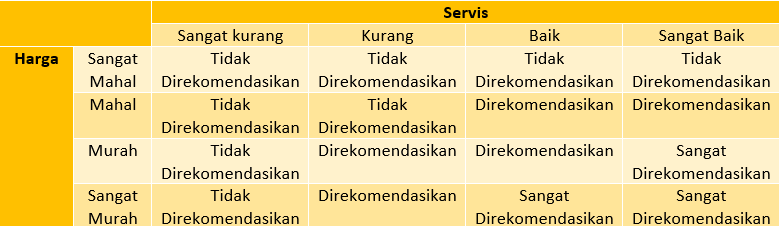



In [ ]:
# Untuk setiap rules merupakan Konjungsi.
# Contoh: IF Harga = Tidak Enak (1) Λ Pelayanan = Sangat Kurang (1) THEN Status = Tidak Direkomendasikan (1)

fuzzy_set_rules = {
    ('Sangat Murah', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Sangat Murah', 'Kurang') : 'Tidak Direkomendasikan',
    ('Sangat Murah', 'Baik') : 'Tidak Direkomendasikan',
    ('Sangat Murah', 'Sangat Baik') : 'Tidak Direkomendasikan',
    ('Murah', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Murah', 'Kurang') : 'Tidak Direkomendasikan',
    ('Murah', 'Baik') : 'Direkomendasikan',
    ('Murah', 'Sangat Baik') : 'Direkomendasikan',
    ('Mahal', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Mahal', 'Kurang') : 'Direkomendasikan',
    ('Mahal', 'Baik') : 'Direkomendasikan',
    ('Mahal', 'Sangat Baik') : 'Sangat Direkomendasikan',
    ('Sangat Mahal', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Sangat Mahal', 'Kurang') : 'Direkomendasikan',
    ('Sangat Mahal', 'Baik') : 'Sangat Direkomendasikan',
    ('Sangat Mahal', 'Sangat Baik') : 'Sangat Direkomendasikan',
}

In [ ]:
inference_result = []

def inference(fuzzed):
    result = {'Tidak Direkomendasikan': 0, "Direkomendasikan": 0, "Sangat Direkomendasikan": 0}

    for Servis in fuzzed['Servis'].keys():
        for Harga in fuzzed['Harga'].keys():
            min_value = min(fuzzed['Harga'][Harga], fuzzed['Servis'][Servis])

            # Proses Conjunction Sesuai Fuzzy Rules pada variabel fuzzy_set_rules
            output = fuzzy_set_rules[(Harga, Servis)]

            if min_value > result[output]:
               result[output] = min_value

    return result

In [ ]:
for fuzzed in fuzzify:
    inference_result.append(inference(fuzzed))

x = 0
print("Contoh Hasil Inferensi :\n")
for i in range(0,10):
    print(inference_result[i])

Contoh Hasil Inferensi :

{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1.0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1.0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0.5, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}


# ****Defuzzifikasi****

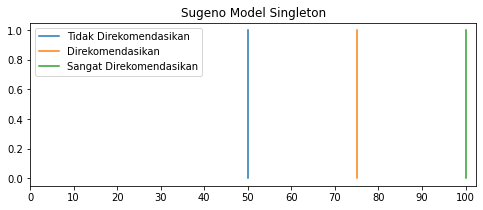

In [ ]:
plt.figure(figsize=(8, 3))
plt.title("Sugeno Model Singleton")

plt.plot([50, 50], [0, 1], label="Tidak Direkomendasikan")
plt.plot([75, 75], [0, 1], label="Direkomendasikan")
plt.plot([100, 100], [0, 1], label="Sangat Direkomendasikan")
plt.xticks(np.arange(0, 110, 10.0))
plt.legend()
plt.show()

In [ ]:
deffuzy = {'Tidak Direkomendasikan': 50, "Direkomendasikan": 75, "Sangat Direkomendasikan": 100}

def defuzzification(inference, deffuzy):
    numerator, denominator = 0, 0
    
    for output in deffuzy.keys():
        numerator += inference[output] * deffuzy[output]
        denominator += inference[output]
        
    return numerator/denominator

final = []

for inference in inference_result:
    final.append(defuzzification(inference, deffuzy))

In [ ]:
print("Contoh Hasil Defuzifikasi:\n")
for i in range(0, 10):
    print(f'Data Ke-{i+1} = {final[i]}')

Contoh Hasil Defuzifikasi:

Data Ke-1 = 50.0
Data Ke-2 = 50.0
Data Ke-3 = 50.0
Data Ke-4 = 50.0
Data Ke-5 = 50.0
Data Ke-6 = 75.0
Data Ke-7 = 75.0
Data Ke-8 = 50.0
Data Ke-9 = 50.0
Data Ke-10 = 50.0


# ****Hasil****

In [ ]:
data['result'] = final
data = data.sort_values(by='result', ascending=False)[:10]

data['id'].to_excel('peringkat.xls', index=False, header=False)  
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  after removing the cwd from sys.path.


,id,servis,harga,result
23,24,100,9,100.0
41,42,94,10,100.0
68,69,86,10,100.0
30,31,74,9,75.0
15,16,82,6,75.0
82,83,69,8,75.0
24,25,61,10,75.0
69,70,78,8,75.0
21,22,79,9,75.0
94,95,63,8,75.0
